In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../../../src')

from feature_engineering import SimpleSensorFE

In [10]:
df_devices = pd.read_csv('../../../data/00_raw/full_devices.csv', encoding="latin1")

<b> Primero vamos deletar la variable que no es necesaria que tiene 100% de correlacion o se es la misma </b>
- Vamos mantener el atributo 7

In [11]:
df_devices.drop(columns=['attribute8'], inplace=True)

<b> Como no tenemos mucha descripcion do que las variables, vamos a recorrer a rolling variables </b>
- Al principio voy utilizar un rolling mean de 3 y un diff de 1 para lo anterior
- Va a ser un total de ~16 nuevas variables, cuando empezarmos lo entrenamiento de los modelos vamos iterar con las nuevas variables

In [13]:
df_devices['date'] = pd.to_datetime(df_devices['date'])

In [17]:
# Ambos
fe_both = SimpleSensorFE(do_diff=True, do_roll_mean=True, roll_windows=[3])
df_both = fe_both.fit_transform(df_devices)

In [19]:
df_both.sample(3)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,...,attribute4_diff1,attribute4_roll_mean3,attribute5_diff1,attribute5_roll_mean3,attribute6_diff1,attribute6_roll_mean3,attribute7_diff1,attribute7_roll_mean3,attribute9_diff1,attribute9_roll_mean3
89386,2015-06-05,Z1F0LH2M,0,238200024,0,0,0,9,462533,0,...,0.0,0.0,0.0,9.0,2.0,462531.000000,0.0,0.0,0.0,0.0
110024,2015-08-04,Z1F1A1HH,0,173238112,0,0,0,7,256721,0,...,0.0,0.0,0.0,7.0,1286.0,254144.666667,0.0,0.0,0.0,0.0
106740,2015-07-26,S1F0LBY2,0,131875904,0,0,0,12,498608,0,...,0.0,0.0,0.0,12.0,0.0,498355.000000,0.0,0.0,0.0,0.0


In [21]:
# Compute correlation matrix
corr = df_both.corr(numeric_only=True)

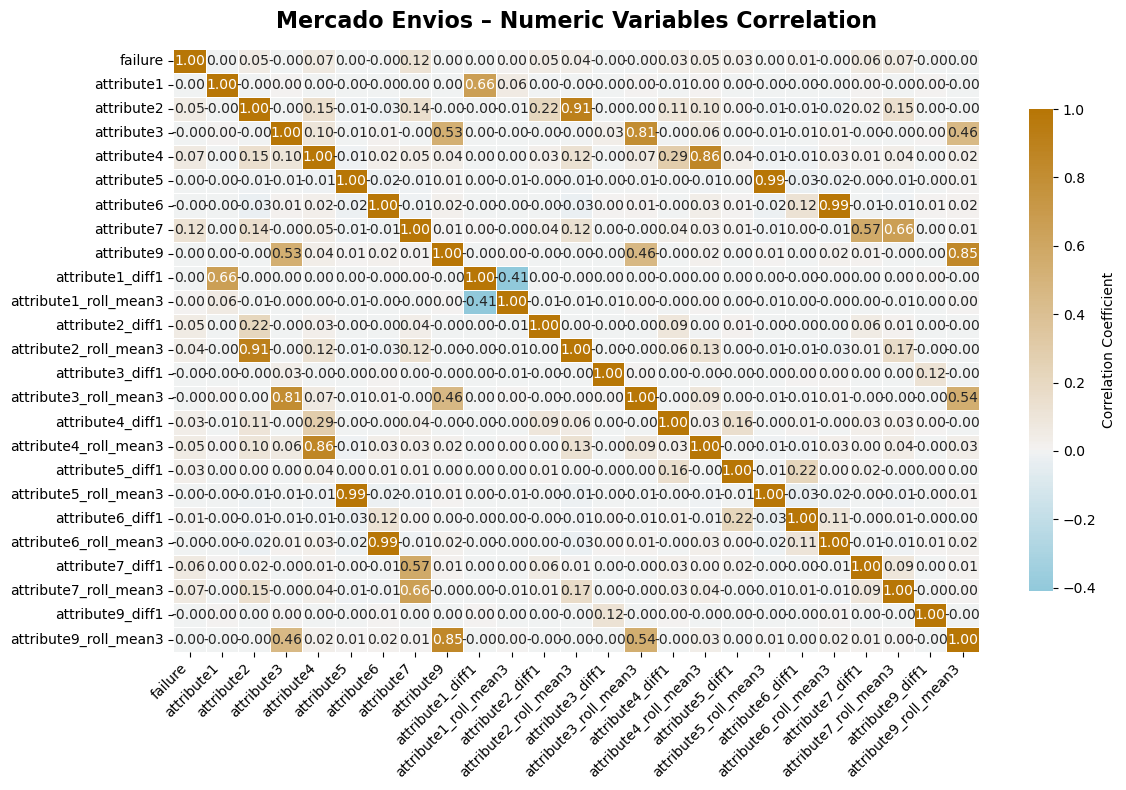

In [ ]:
# Crea la figura de lo heatmap
plt.figure(figsize=(12, 8))

# Define una paletta inspirada por lo mercadolivre
cmap = sns.diverging_palette(230, 45, s=99, l=55, as_cmap=True)  

# Crear el heatmap
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}
)

# Titulos y estilos
plt.title("Mercado Envios – Numeric Variables Correlation", fontsize=16, fontweight="bold", pad=15)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.show()

<b> Fueran creadas muchas variables con alto nivel de correlacion ~> 0.8 <b>
- Vamos filtrar estas y ver de nuevo nuestra correlacion

In [ ]:
# Calcular la matriz de correlacion
corr_matrix = df_both.corr(numeric_only=True).abs()

# Dejar solo la parte superior de la matriz
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Seleccionar columnas con correlacion > 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Solo las generadas
generated_vars = [col for col in df_both.columns if '_diff' in col or '_roll_mean' in col]
to_drop_generated = [col for col in to_drop if col in generated_vars]

# Eliminar las columnas
df_reduced = df_both.drop(columns=to_drop_generated)

print(f"Dropped {len(to_drop_generated)} generated variables due to high correlation")

Dropped 6 generated variables due to high correlation


In [ ]:
# Computar la matriz de correlacion
corr = df_reduced.corr(numeric_only=True)

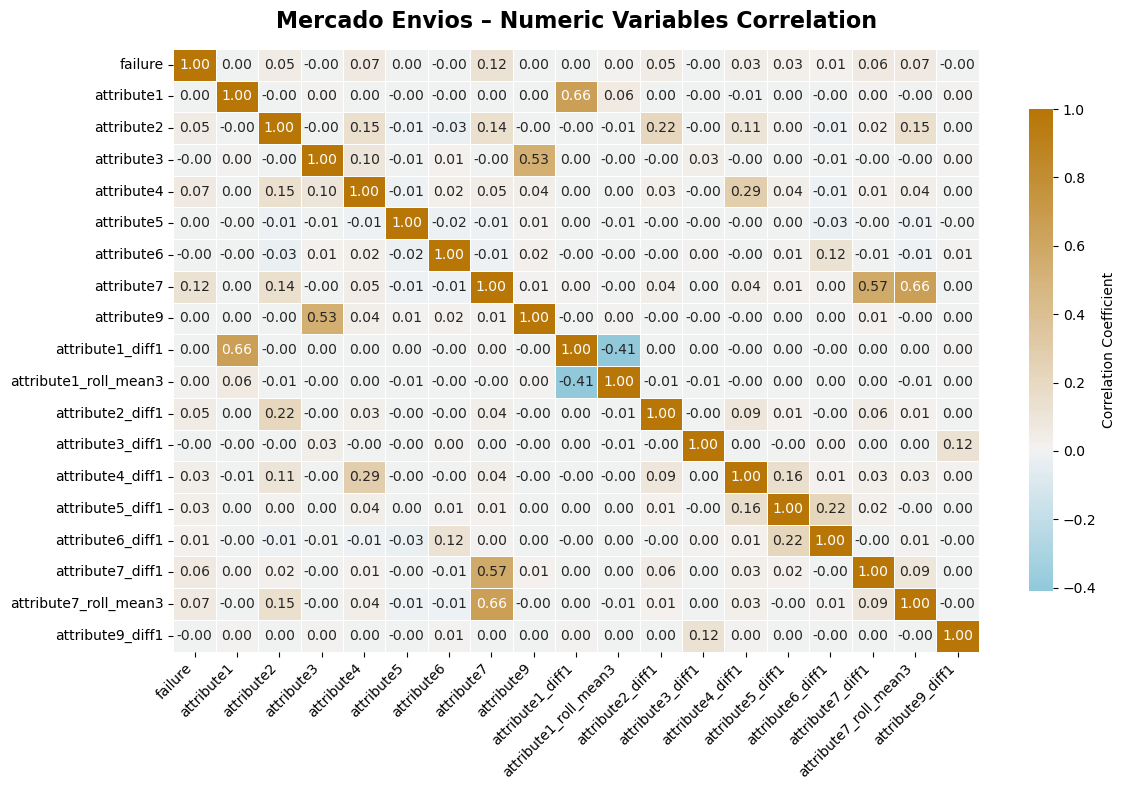

In [ ]:
# Crea la figura de lo heatmap
plt.figure(figsize=(12, 8))

# Define una paletta inspirada por lo mercadolivre
cmap = sns.diverging_palette(230, 45, s=99, l=55, as_cmap=True)  

# Crear el heatmap
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}
)

# Titulos y estilos
plt.title("Mercado Envios – Numeric Variables Correlation", fontsize=16, fontweight="bold", pad=15)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.show()

<b> Aun tenemos algumas variables con correlaciones un poquito más altas pero vamos intentar </b>

In [30]:
df_reduced.reset_index(drop=True, inplace=True)

In [31]:
df_reduced.to_parquet('../../../data/01_processed/full_devices.parquet')